# Matrix as a Function & Plotting Vectors
** October 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

One of the fundamental concepts that is key to understanding and working with linear algebra is the notion that a matrix represents a linear transformation aka a linear function. This notebook will show you why that is.

**Questions explored by this notebook**
* Why is linear algebra called 'linear' algebra.
* How does a matrix represent a linear function?
* What is the geometric interpretation of linear funcitons?
* How do we plot vectors using matplotlib?

** Resources **
* https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.quiver.html

## Libraries

In [214]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Matrices as Linear Functions

A matrix defines a linear function. A matrix multiplied by a vector is equivalent of applying a linear function. A matrix multiplied by another matrix is equivalent to function composition. Below we have a matrix *a* and it's equivalent function defintion *fn*. We show here how they are equivalent. See the notebook *Linear Vs. Non-Linear Functions* for why we can define a linear function as a matrix. 

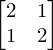

In [215]:
sp.init_printing()
def fn(x,y):
    return sp.Matrix( [2*x + 1*y, (1*x+2*y)] )

a = sp.Matrix([[2,1],[1,2]]) # 2 * 2
b = sp.Matrix([2,2]) # 2 * 1
a

In [216]:
a * b

In [217]:
fn(2,2)

## Plotting Vectors

Due to linear algebra having such a strong geometric interpretation, it's helpful to have the tools to visualize what's going on. Here we will discuss how to plot vectors using matplotlib. 

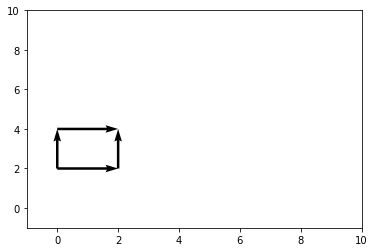

In [218]:
# [start_loc_x, start_loc_y, x_magintute, y_magintude]
vects = np.array([[0, 2, 2, 0], 
                  [0, 2, 0, 2],
                  [0, 4, 2, 0],
                  [2, 2, 0, 2]])

# Unpack vects into their respective tupules.
X_LOC, Y_LOC, X_MAG, Y_MAG = zip(*vects)

plt.figure()

# GCA = Get current axes.
ax = plt.gca()
ax.quiver(X_LOC, Y_LOC, X_MAG, Y_MAG, angles='xy', scale_units='xy', scale=1)

# Set the scale of the tics on the x and y axes. 
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])

plt.show()

## Linear Transformations

In this section we will define a rectagle by a series of points, then we will define a linear transformation, a matrix, that transforms these points, thereby transforming the defined rectangle. First we will start by defining a function, *plotRect*, which plots a rectangle.

In [219]:
def plotRect(lb,lt,rt,rb):
    
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    
    # Setup grid and axes. 
    ax.axhline(linewidth=2.0, color="black")
    ax.axvline(linewidth=2.0, color="black")
    ax.grid(color='b', linestyle='-', linewidth=1)
    
    ax.set_yticks(range(-10,11))
    ax.set_xticks(range(-10,11))

    # Set the scale of the tics on the x and y axes. 
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    
    # Plot square based on points. 
    # [x1,x2],[y1,y2]
    plt.plot([lb[0],lt[0]], [lb[1],lt[1]], 'k-', lw=2)
    plt.plot([lt[0],rt[0]], [lt[1],rt[1]], 'k-', lw=2)
    plt.plot([rt[0],rb[0]], [rt[1],rb[1]], 'k-', lw=2)
    plt.plot([rb[0],lb[0]], [rb[1],lb[1]], 'k-', lw=2)

    plt.show()

Now we will define a rectangle by a series of points, (lb,lt,rt,br), and plot it using our above function.

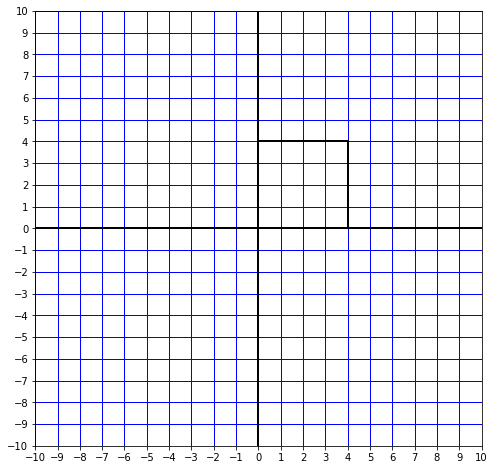

In [220]:
# Left bottom point
lb = sp.Matrix([0,0])
# Left top point
lt = sp.Matrix([0,4])
# Right top point
rt = sp.Matrix([4,4])
# Bottom right point

rb = sp.Matrix([4,0])

plotRect(lb,lt,rt,rb)

Let's definine a funciton that applies a 2 * 2 matrix to four points that we will use to transform the rectangle defined by the points above. 

In [221]:
def transform(m,lb,lt,rt,rb):
    lb_o = m * lb
    lt_o = m * lt
    rt_o = m * rt
    rb_o = m * rb
    
    return [lb_o,lt_o,rt_o,rb_o]

We will now define a matrix which we we will use to transform the rectangle. 

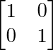

In [222]:
# M is an identity matrix. 
m = sp.Matrix([[1,0],[0,1]])
m

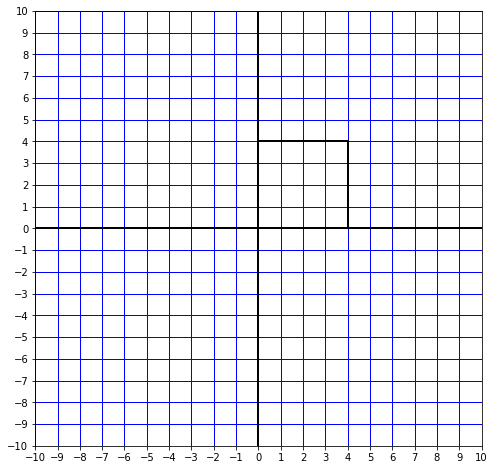

In [223]:
lb_t,lt_t,rt_t,rb_t = transform(m,lb,lt,rt,rb)
plotRect(lb_t,lt_t,rt_t,rb_t)

As we see, the identity matrix preserves the original size of the square. Let's now play around with different matricies to see how they spatially transform the rectangle. 

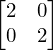

In [224]:
m = sp.Matrix([[2,0],[0,2]])
m

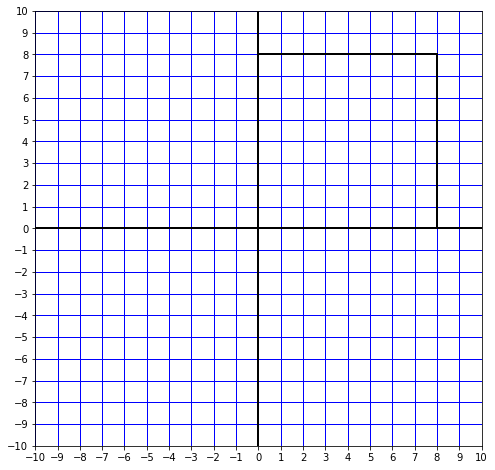

In [225]:
lb_t,lt_t,rt_t,rb_t = transform(m,lb,lt,rt,rb)
plotRect(lb_t,lt_t,rt_t,rb_t)

As we see, changing the values on the diagonal scales the rectangle. 

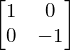

In [226]:
m = sp.Matrix([[1,0],[0,-1]])
m

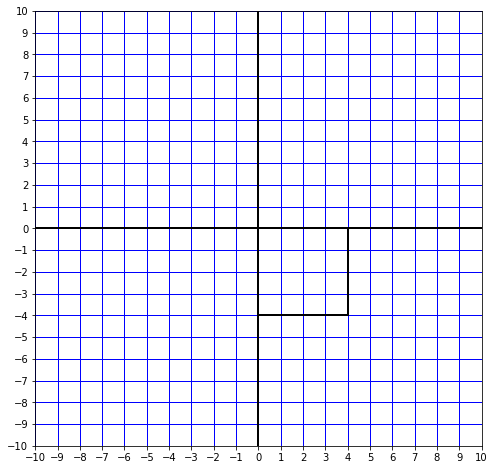

In [227]:
lb_t,lt_t,rt_t,rb_t = transform(m,lb,lt,rt,rb)
plotRect(lb_t,lt_t,rt_t,rb_t)

As we see, changing the signs on the diagonal translates the rectangle over an axis. 

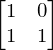

In [236]:
m = sp.Matrix([[1,0],[1,1]])
m

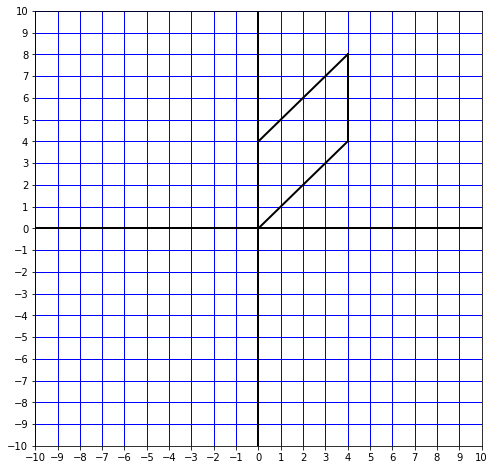

In [237]:
lb_t,lt_t,rt_t,rb_t = transform(m,lb,lt,rt,rb)
plotRect(lb_t,lt_t,rt_t,rb_t)

When we start changing the values on the counterdiagonal, we start skewing the rectangle. By changing the values on the diagonal and counterdiagonal, we can perform any linear transformation to our square. If we apply successive linear transformations, affine transformations, we can do things like rotation. Play around with the values for the matrix to see how different values result in different linear transformations of the rectangle. 